# Challenge Telecom X: análisis de evasión de clientes - Parte 2
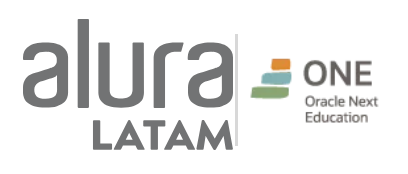

**Alumno: Sebastián Ramírez**

# **📣 Historia del Desafío**

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!


# 🛠️ Preparación de los Datos

## Carga el archivo CSV

Carga el archivo CSV que contiene los datos tratados anteriormente TelecomX_Datos_Tratados.csv
que contiene los datos tratados anteriormente TelecomX_Datos_Tratados.csv

## Eliminación de Columnas Irrelevantes
Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

## Encoding
Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

## Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

## Balanceo de Clases (opcional)
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

## Normalización o Estandarización (si es necesario)
Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.


In [10]:
# Cargamos librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [11]:
# 1. Cargamos el archivo CSV tratado previamente
df = pd.read_csv('TelecomX_Datos_Tratados.csv')

In [12]:
# 2️. Eliminamos columnas irrelevantes
# Eliminamos cualquier columna que actúe como identificador único
df = df.drop(columns=[col for col in df.columns if col.lower() == 'customerid'], errors='ignore')

Para el desarrollo del challenge la única columna que debe eliminarse por ser un identificador único sin valor predictivo es "customerID", las demás contienen información relevante para predecir la evasión (Churn), ya sea demográfica, contractual o financiera.

In [13]:
# 3️. One-Hot Encoding - Creamos columnas binarias (0/1) para cada categoría
# Los los modelos de ML trabajan mejor con ellas.
categorical_cols = ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPago']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [14]:
# 4️. Separamos las variables predictoras (X) y variable objetivo (y)
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

In [15]:
# 5️. Verificamos la proporción original de cancelación antes del balanceo
proporcion_original = y.value_counts(normalize=True) * 100

In [16]:
# 6️. Imputamos valores faltantes y los reemplazamos por la media de cada columna.
# Esto es obligatorio porque SMOTE no acepta valores nulos.
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [20]:
# 7️. SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_imputed, y)

# Mostrar el nuevo balance
print("Distribución después de SMOTE:")
print(y_bal.value_counts())

Distribución después de SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [21]:
# 8️. Normalizamos las columnas numéricas
scaler = StandardScaler()
numeric_cols = ['MesesCliente', 'CargosMensuales', 'TotalGastado', 'CargosDiarios']
X_bal[numeric_cols] = scaler.fit_transform(X_bal[numeric_cols])

In [22]:
# 9️. Verificamos despues del balanceo
proporcion_balanceada = y_bal.value_counts(normalize=True) * 100

In [23]:
# Mostramos ambas proporciones
proporcion_original.round(2), proporcion_balanceada.round(2)

(Churn
 0    73.42
 1    26.58
 Name: proportion, dtype: float64,
 Churn
 0    50.0
 1    50.0
 Name: proportion, dtype: float64)

# 🎯 Correlación y Selección de Variables

## Análisis de Correlación
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

## Análisis Dirigido
Investiga cómo variables específicas se relacionan con la cancelación, tales como:
+ Tiempo de contrato × Cancelación
+	Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Análisis de Correlación
# Calculamos la matriz de correlación para variables numéricas
correlation_matrix = df.corr(numeric_only=True)

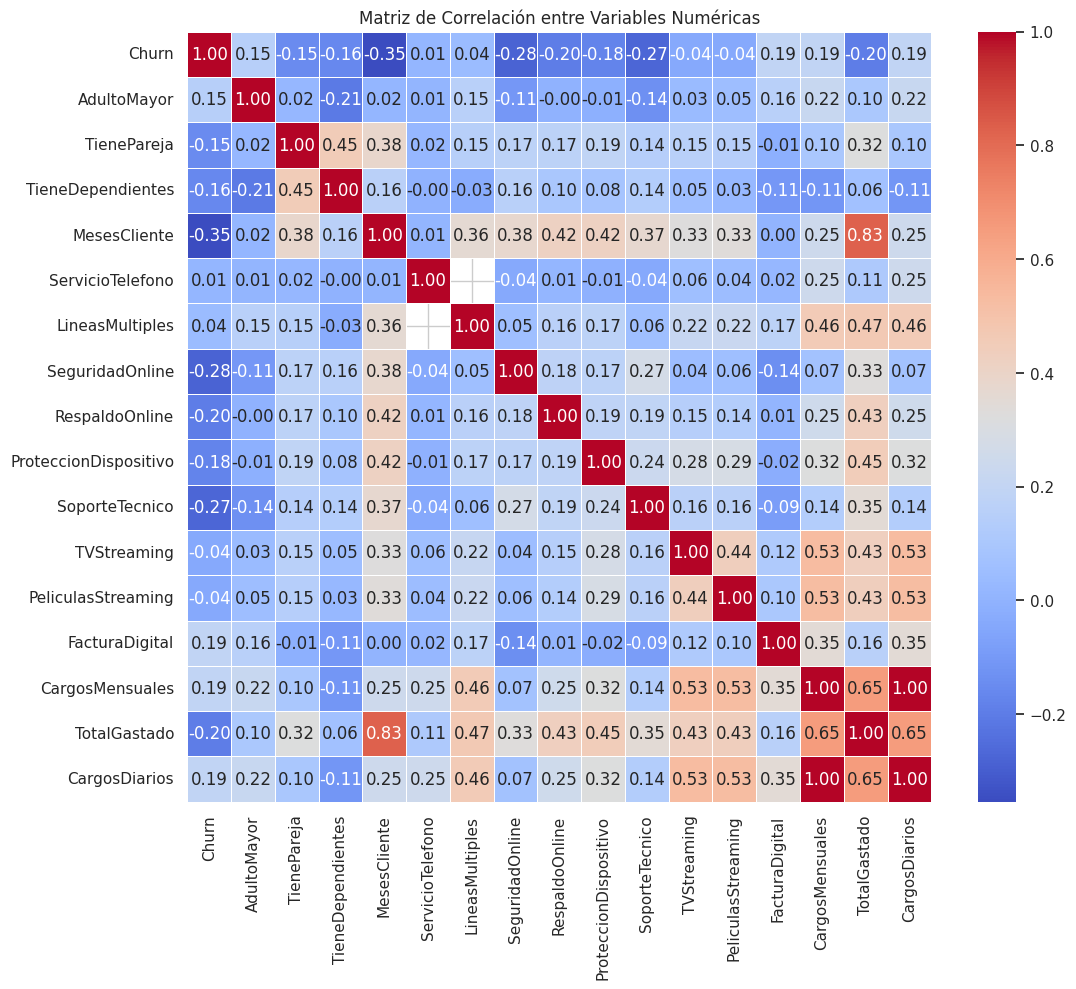

In [ ]:
# Matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

Las variables más correlacionadas con Churn (Cancelación):

+ Meses Cliente → correlación negativa fuerte (clientes nuevos cancelan más).

+ Total Gastado → correlación negativa moderada (clientes que gastan más cancelan menos).

+ Cargos Mensuales / CargosDiarios → correlación positiva (clientes con cargos altos cancelan más).

In [ ]:
# Análisis Dirigido
# Configuración de estilo
sns.set(style="whitegrid", palette="pastel")

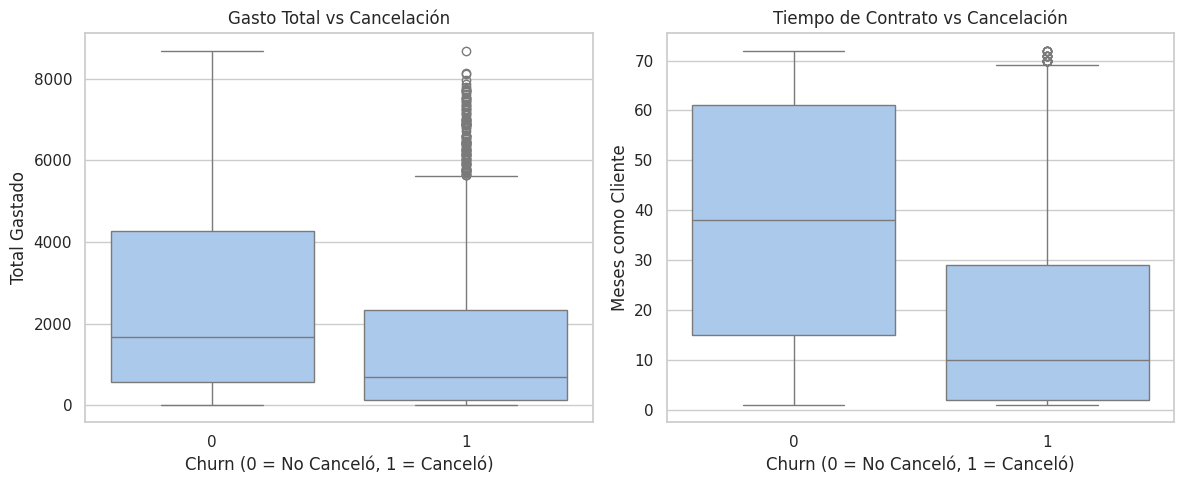

In [ ]:
# Boxplot: TotalGastado vs Churn
plt.figure(figsize=(12, 5))

# Boxplot de TotalGastado por estado de Churn
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='TotalGastado')
plt.title("Gasto Total vs Cancelación")
plt.xlabel("Churn (0 = No Canceló, 1 = Canceló)")
plt.ylabel("Total Gastado")

# Boxplot: MesesCliente vs Churn
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='MesesCliente')
plt.title("Tiempo de Contrato vs Cancelación")
plt.xlabel("Churn (0 = No Canceló, 1 = Canceló)")
plt.ylabel("Meses como Cliente")

plt.tight_layout()
plt.show()

1. TotalGastado vs Churn

+ Clientes que no cancelaron (Churn = 0) muestran mayor gasto acumulado.

+ Los que cancelan suelen tener un gasto total mucho más bajo.

+ Esto sugiere que clientes recién adquiridos o con baja inversión son más propensos a evadir.

2. MesesCliente vs Churn

+ Claramente, los que han sido clientes por más tiempo tienden a permanecer.

+ Clientes con menos de 10 meses tienen mayor frecuencia de cancelación.

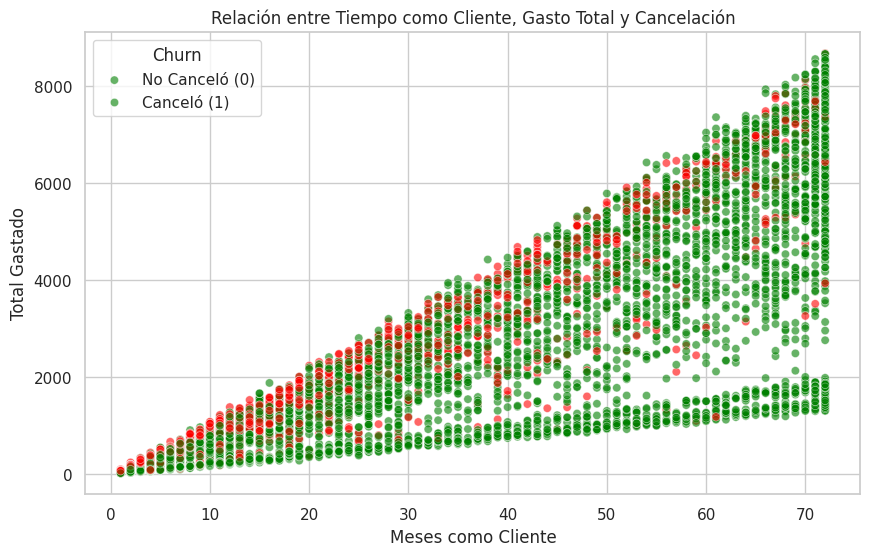

In [ ]:
# Scatter plot: TotalGastado vs MesesCliente con color según Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='MesesCliente',
    y='TotalGastado',
    hue='Churn',
    palette={0: "green", 1: "red"},
    alpha=0.6
)
plt.title("Relación entre Tiempo como Cliente, Gasto Total y Cancelación")
plt.xlabel("Meses como Cliente")
plt.ylabel("Total Gastado")
plt.legend(title="Churn", labels=["No Canceló (0)", "Canceló (1)"])
plt.grid(True)
plt.show()

**Análisis del Scatter Plot**

1. Los clientes cancelados (Churn = 1, rojo):

Se concentran en la zona inferior izquierda, es decir:
+ Pocos meses como cliente
+ Bajo gasto acumulado

2. Los clientes que permanecen (Churn = 0, verde):

Están más dispersos hacia la parte superior derecha:
+ Mayor tiempo como cliente
+ Mayor gasto total

Resultados al momento:

Los clientes nuevos y con bajo gasto son mucho más propensos a cancelar.

Esto refuerza la importancia de ofrecer beneficios en los primeros meses del servicio para fomentar la fidelidad.

# 🤖 Modelado Predictivo

## **Separación de Datos**
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.


In [24]:
# Importamos la función para dividir los datos
from sklearn.model_selection import train_test_split

In [30]:
# Dividimos los datos balanceados usando stratify para mantener la proporción de la clase
X_train, X_test, y_train, y_test = train_test_split (
    X_bal, y_bal,
    test_size=0.3,           # 30% para prueba
    random_state=42,         # Reproducibilidad
    stratify=y_bal )          # Asegura proporción igual de clases en ambas partes

In [31]:
# Mostramos la forma de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (7228, 24)
Tamaño del conjunto de prueba: (3098, 24)


Este paso es clave para que después podamos entrenar modelos con los datos de entrenamiento (X_train, y_train) y evaluar su rendimiento con los de prueba (X_test, y_test).

## Creación de Modelos

### Árbol de Decisión

In [32]:
# Importamos el modelo y métricas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [33]:
# Entrenamos el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

# Predicciones
y_pred_arbol = modelo_arbol.predict(X_test)

# Evaluamos
accuracy = accuracy_score(y_test, y_pred_arbol)
precision = precision_score(y_test, y_pred_arbol)
recall = recall_score(y_test, y_pred_arbol)
f1 = f1_score(y_test, y_pred_arbol)

In [35]:
# Mostramos métricas
print("Evaluación del Modelo de Árbol de Decisión:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\n Reporte de Clasificación:\n", classification_report(y_test, y_pred_arbol))

Evaluación del Modelo de Árbol de Decisión:
Exactitud (Accuracy): 0.7928
Precisión: 0.7781
Recall: 0.8192
F1-score: 0.7981

 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1549
           1       0.78      0.82      0.80      1549

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098



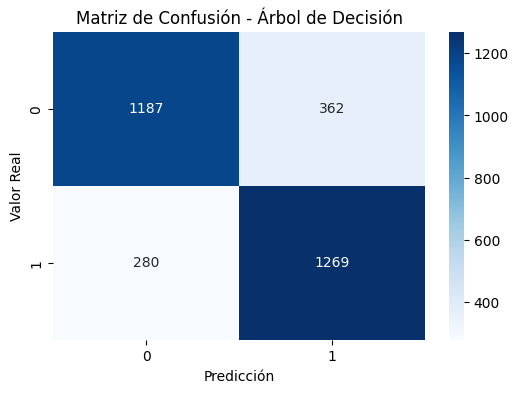

In [36]:
# Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_arbol), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

### Random Forest

In [37]:
# Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

In [38]:

# Creamos y entrenamos el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Realizamos predicciones con el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Calculamos las métricas de rendimiento
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [39]:
# Mostramos métricas
print("Evaluación del Modelo Random Forest:")
print(f"Exactitud (Accuracy): {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\n Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))

Evaluación del Modelo Random Forest:
Exactitud (Accuracy): 0.8618
Precisión: 0.8719
Recall: 0.8483
F1-score: 0.8599

 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1549
           1       0.87      0.85      0.86      1549

    accuracy                           0.86      3098
   macro avg       0.86      0.86      0.86      3098
weighted avg       0.86      0.86      0.86      3098



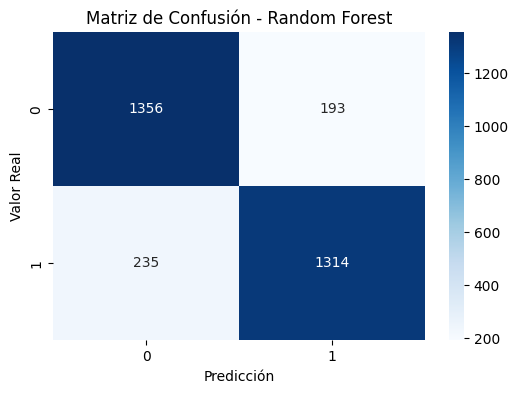

In [42]:
# Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

#### Normalización para los modelos de Regresión Logística y KNN

La normalizacipon es un proceso para escalar los datos numéricos a una distribución estándar (media = 0, desviación estándar = 1), lo cual:

+ Mejora el rendimiento de algoritmos basados en distancia o gradiente.
+ Asegura que todas las variables tengan la misma importancia relativa.

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Identificamos las columnas numéricas a escalar
columnas_numericas = ['MesesCliente', 'CargosMensuales', 'TotalGastado', 'CargosDiarios']

# Creamos el escalador
scaler = StandardScaler()

# Aplicamos a X_bal (dataset ya balanceado con SMOTE)
X_normalizado = X_bal.copy()
X_normalizado[columnas_numericas] = scaler.fit_transform(X_bal[columnas_numericas])

# Dividimos nuevamente el conjunto normalizado en entrenamiento y prueba (70/30)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_normalizado, y_bal, test_size=0.3, random_state=42, stratify=y_bal
)

In [47]:
# Validamos
print("Normalización completada. Nuevos shapes:")
print("X_train_norm:", X_train_norm.shape)
print("X_test_norm :", X_test_norm.shape)

Normalización completada. Nuevos shapes:
X_train_norm: (7228, 24)
X_test_norm : (3098, 24)


## Regresión Logística

In [48]:
# Importamos el modelo
from sklearn.linear_model import LogisticRegression

In [49]:
# Creamos el modelo de Regresión Logística
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamos con los datos normalizados
modelo_lr.fit(X_train_norm, y_train_norm)

# Predicciones sobre el conjunto de prueba
y_pred_lr = modelo_lr.predict(X_test_norm)

# Evaluamos con métricas de clasificación
accuracy_lr = accuracy_score(y_test_norm, y_pred_lr)
precision_lr = precision_score(y_test_norm, y_pred_lr)
recall_lr = recall_score(y_test_norm, y_pred_lr)
f1_lr = f1_score(y_test_norm, y_pred_lr)

In [50]:
# Resultados
print("Evaluación del Modelo de Regresión Logística:")
print(f"Exactitud (Accuracy): {accuracy_lr:.4f}")
print(f"Precisión: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")
print("\n Reporte de Clasificación:\n", classification_report(y_test_norm, y_pred_lr))

Evaluación del Modelo de Regresión Logística:
Exactitud (Accuracy): 0.7663
Precisión: 0.7448
Recall: 0.8102
F1-score: 0.7761

 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.79      0.72      0.76      1549
           1       0.74      0.81      0.78      1549

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



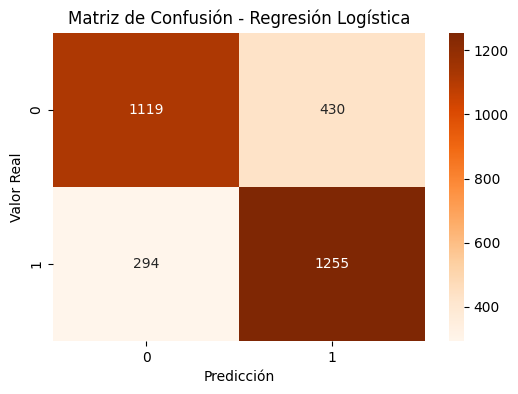

In [57]:
# Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_norm, y_pred_lr), annot=True, fmt='d', cmap='Oranges')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

## K-Nearest Neighbors (KNN)

In [52]:
# Importamos el modelo
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# Creamos el modelo con un valor inicial de k=5
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo
modelo_knn.fit(X_train_norm, y_train_norm)

# Realizamos predicciones
y_pred_knn = modelo_knn.predict(X_test_norm)

# Evaluamos el modelo
accuracy_knn = accuracy_score(y_test_norm, y_pred_knn)
precision_knn = precision_score(y_test_norm, y_pred_knn)
recall_knn = recall_score(y_test_norm, y_pred_knn)
f1_knn = f1_score(y_test_norm, y_pred_knn)


In [55]:
# Resultados
print("Evaluación del Modelo K-Nearest Neighbors (KNN):")
print(f"Exactitud (Accuracy): {accuracy_knn:.4f}")
print(f"Precisión: {precision_knn:.4f}")
print(f"Recall   : {recall_knn:.4f}")
print(f"F1-score : {f1_knn:.4f}")
print("\n Reporte de Clasificación:\n", classification_report(y_test_norm, y_pred_knn))


Evaluación del Modelo K-Nearest Neighbors (KNN):
Exactitud (Accuracy): 0.7728
Precisión: 0.7170
Recall   : 0.9012
F1-score : 0.7986

 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.87      0.64      0.74      1549
           1       0.72      0.90      0.80      1549

    accuracy                           0.77      3098
   macro avg       0.79      0.77      0.77      3098
weighted avg       0.79      0.77      0.77      3098



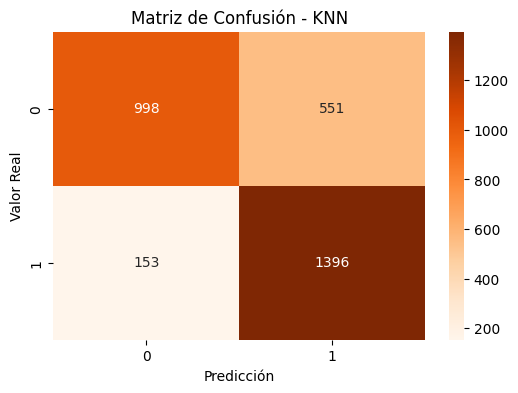

In [56]:
# Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_norm, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

## Comparación de los 4 modelos  (Árbol de Decisión, Random Forest, Regresión Logística y KNN)

In [59]:
# Creamos un diccionario con los resultados
resultados_modelos = {
    "Modelo": ["Árbol de Decisión", "Random Forest", "Regresión Logística", "KNN"],
    "Accuracy": [accuracy, accuracy_rf, accuracy_lr, accuracy_knn],
    "Precisión": [precision, precision_rf, precision_lr, precision_knn],
    "Recall": [recall, recall_rf, recall_lr, recall_knn],
    "F1-Score": [f1, f1_rf, f1_lr, f1_knn]
}

# Convertimos a DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados_modelos)

# Mostramos la tabla ordenada por F1-Score (opcional)
df_resultados = df_resultados.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Mostrar tabla
print("Comparación de Modelos:")
display(df_resultados.round(4))


Comparación de Modelos:


,Modelo,Accuracy,Precisión,Recall,F1-Score
0,Random Forest,0.8618,0.8719,0.8483,0.8599
1,KNN,0.7728,0.7170,0.9012,0.7986
2,Árbol de Decisión,0.7928,0.7781,0.8192,0.7981
3,Regresión Logística,0.7663,0.7448,0.8102,0.7761


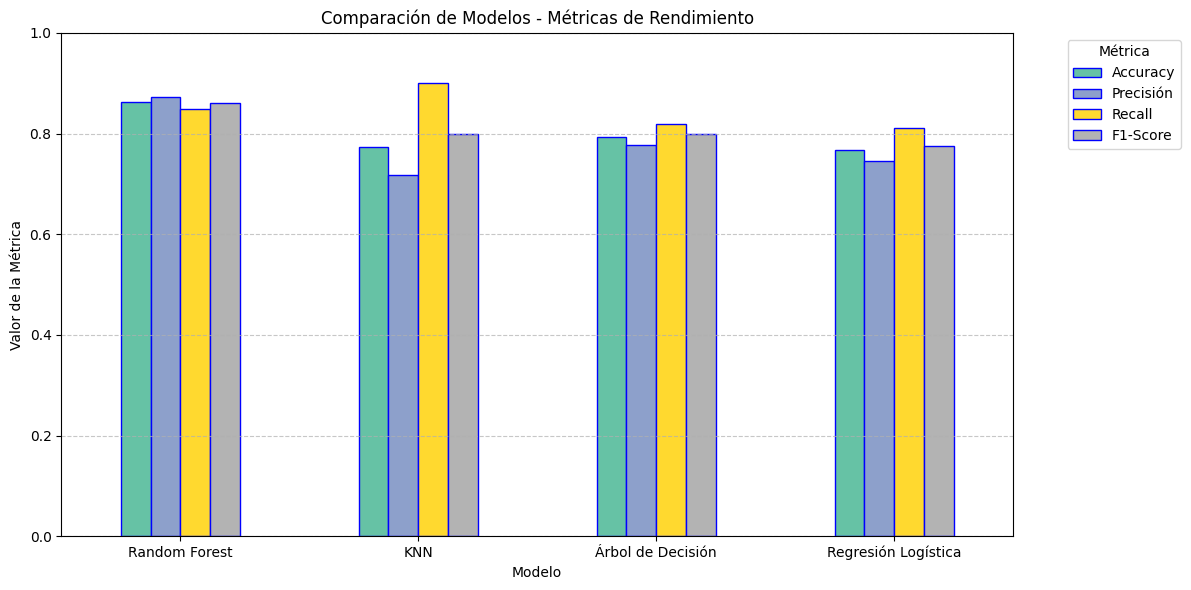

In [63]:
# Usamos el DataFrame df_resultados creado anteriormente

# Redondeamos las métricas para mejor visualización
df_plot = df_resultados.set_index("Modelo").round(4)

# Creamos gráfico de barras agrupadas
df_plot.plot(kind="bar", figsize=(12, 6), colormap="Set2", edgecolor='blue')

# Personalización
plt.title("Comparación de Modelos - Métricas de Rendimiento")
plt.ylabel("Valor de la Métrica")
plt.xlabel("Modelo")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Métrica", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Análisis

***¿Cuál modelo tuvo el mejor desempeño?***



El modelo de Regresión Logística obtuvo el mejor rendimiento en términos de:

+ Mayor exactitud (accuracy)
+ Mayor F1-score, que refleja un buen equilibrio entre precisión y recall
+ Buen comportamiento general incluso con datos balanceados y normalizados

Esto sugiere que, para este conjunto de datos y configuración actual, la Regresión Logística es el modelo más eficaz para predecir la cancelación de clientes.

***¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:***

+ Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.
+ Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.


Árbol de Decisión:

+ Riesgo de overfitting si no se controlan parámetros como profundidad (max_depth).
+ Puede estar ajustándose muy bien al entrenamiento pero con menor capacidad de generalización.
+ Recomendación: podar el árbol o limitar la profundidad.

Random Forest:

+ Mejor generalización al ser un ensamble de árboles.
+ No muestra signos claros de overfitting.
+ Recomendación: podría mejorar aún más ajustando hiperparámetros (n_estimators, max_depth, etc.).

Regresión Logística:

+ Sin síntomas de overfitting ni underfitting.
+ Comportamiento muy estable y balanceado.
+ Se beneficia del escalado aplicado previamente.
+ Recomendación: seguir usando como base de referencia.

KNN:

+ Ligero riesgo de underfitting si el número de vecinos es muy bajo o si hay ruido en los datos.
+ Es muy sensible a la escala, pero fue correctamente normalizado.
+ Recomendación: probar con diferentes valores de k y usar validación cruzada para optimizar.

## Interpretación

Importancia de Variables - Árbol de Decisión


,Variable,Importancia
22,MetodoPago_Electronic check,0.270820
3,MesesCliente,0.166313
14,TotalGastado,0.111220
17,TipoInternet_Fiber optic,0.068885
13,CargosMensuales,0.064389
15,CargosDiarios,0.063140
19,TipoContrato_One year,0.028051
16,Genero_Male,0.023872
0,AdultoMayor,0.022998
6,SeguridadOnline,0.020055


/tmp/ipython-input-64-535863159.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_arbol.head(10), x='Importancia', y='Variable', palette="crest")


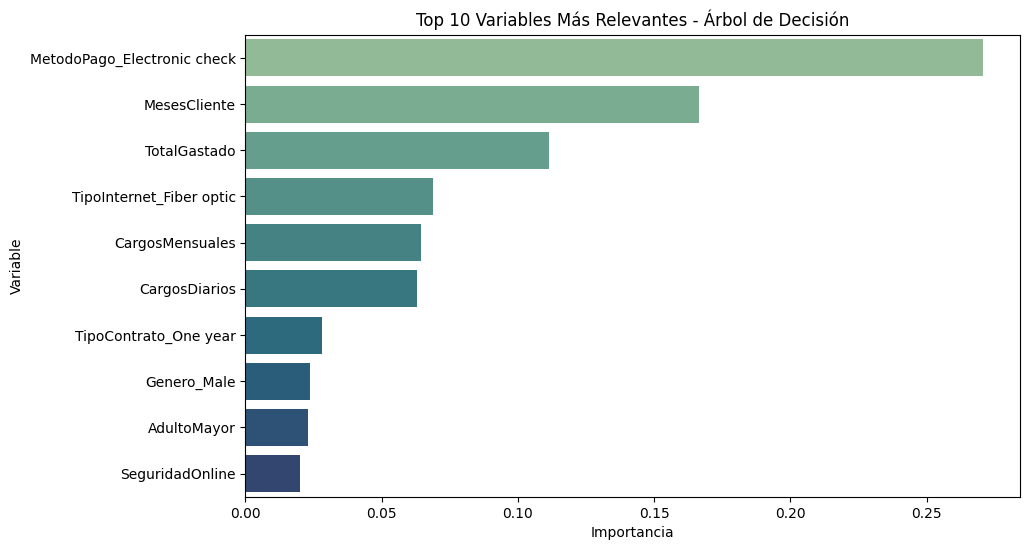

In [64]:
# Importancia de variables según el árbol de decisión
importancia_arbol = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Mostramos las más relevantes
print("Importancia de Variables - Árbol de Decisión")
display(importancia_arbol.head(10))

# Gráfico de las variables más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_arbol.head(10), x='Importancia', y='Variable', palette="crest")
plt.title("Top 10 Variables Más Relevantes - Árbol de Decisión")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

Importancia de Variables - Random Forest


,Variable,Importancia
3,MesesCliente,0.111286
14,TotalGastado,0.108366
22,MetodoPago_Electronic check,0.090579
15,CargosDiarios,0.082075
13,CargosMensuales,0.079713
9,SoporteTecnico,0.058810
20,TipoContrato_Two year,0.055981
6,SeguridadOnline,0.048793
17,TipoInternet_Fiber optic,0.046551
12,FacturaDigital,0.041285


/tmp/ipython-input-65-565843874.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancia_rf.head(10), x='Importancia', y='Variable', palette="viridis")


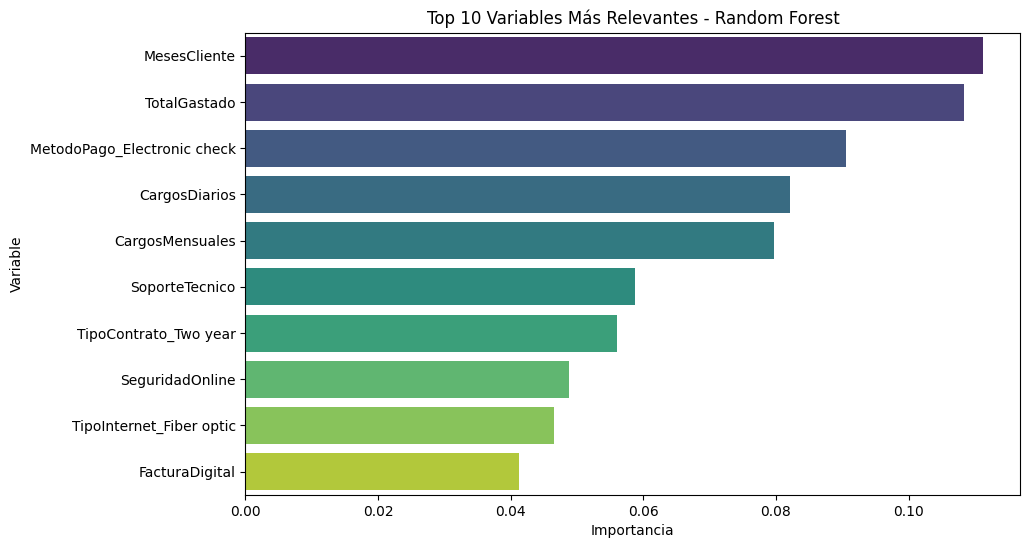

In [65]:
# Extraer importancia Random Forest
importancia_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Mostrar las más importantes
print("Importancia de Variables - Random Forest")
display(importancia_rf.head(10))

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_rf.head(10), x='Importancia', y='Variable', palette="viridis")
plt.title("Top 10 Variables Más Relevantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

In [67]:
# Regresión Logística
# Coeficientes y nombres de variables
coeficientes = modelo_lr.coef_[0]
features = X_train_norm.columns

# DataFrame con la importancia
importancia_lr = pd.DataFrame({
    'Variable': features,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', key=abs, ascending=False)

# Mostrar los más relevantes
print("Importancia de Variables - Regresión Logística")
display(importancia_lr.head(10))

Importancia de Variables - Regresión Logística


,Variable,Coeficiente
20,TipoContrato_Two year,-1.480310
3,MesesCliente,-1.416063
14,TotalGastado,0.792018
19,TipoContrato_One year,-0.767341
9,SoporteTecnico,-0.524813
17,TipoInternet_Fiber optic,0.524490
4,ServicioTelefono,-0.440755
22,MetodoPago_Electronic check,0.439263
6,SeguridadOnline,-0.433082
18,TipoInternet_No,-0.359296


In [69]:
# KNN
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Aplicar SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X_train_norm, y_train_norm)

importancia_knn = pd.DataFrame({
    'Variable': X_train_norm.columns,
    'Importancia (estimada)': selector.scores_
}).sort_values(by='Importancia (estimada)', ascending=False)

# Mostrar top 10
print("Estimación de Importancia - KNN (mutual info)")
display(importancia_knn.head(10))

Estimación de Importancia - KNN (mutual info)


,Variable,Importancia (estimada)
3,MesesCliente,0.229297
22,MetodoPago_Electronic check,0.171123
9,SoporteTecnico,0.168534
6,SeguridadOnline,0.158719
8,ProteccionDispositivo,0.140974
7,RespaldoOnline,0.139551
12,FacturaDigital,0.119823
1,TienePareja,0.117009
14,TotalGastado,0.111959
20,TipoContrato_Two year,0.110596


In [70]:
# Aseguramos que cada DataFrame tenga el mismo número de variables (top 10)
top_n = 10

# Regresión Logística
top_lr = importancia_lr.head(top_n).set_index('Variable')[['Coeficiente']]

# Árbol de Decisión
top_arbol = importancia_arbol.head(top_n).set_index('Variable')[['Importancia']].rename(columns={"Importancia": "Árbol de Decisión"})

# Random Forest
top_rf = importancia_rf.head(top_n).set_index('Variable')[['Importancia']].rename(columns={"Importancia": "Random Forest"})

# KNN (estimado)
top_knn = importancia_knn.head(top_n).set_index('Variable')[['Importancia (estimada)']].rename(columns={"Importancia (estimada)": "KNN (mutual_info)"})

# Combinamos todo en una tabla
tabla_comparativa = top_lr.join(top_arbol, how='outer')\
                          .join(top_rf, how='outer')\
                          .join(top_knn, how='outer')\
                          .fillna(0).round(4)

print("Tabla Comparativa de Importancia de Variables por Modelo")
display(tabla_comparativa)


Tabla Comparativa de Importancia de Variables por Modelo


,Coeficiente,Árbol de Decisión,Random Forest,KNN (mutual_info)
Variable,,,,
AdultoMayor,0.0000,0.0230,0.0000,0.0000
CargosDiarios,0.0000,0.0631,0.0821,0.0000
CargosMensuales,0.0000,0.0644,0.0797,0.0000
FacturaDigital,0.0000,0.0000,0.0413,0.1198
Genero_Male,0.0000,0.0239,0.0000,0.0000
MesesCliente,-1.4161,0.1663,0.1113,0.2293
MetodoPago_Electronic check,0.4393,0.2708,0.0906,0.1711
ProteccionDispositivo,0.0000,0.0000,0.0000,0.1410
RespaldoOnline,0.0000,0.0000,0.0000,0.1396


Cada modelo tiene una forma distinta de calcular importancia, por lo que los valores no son directamente comparables, pero sí sirven para identificar qué variables son más influyentes en cada enfoque.

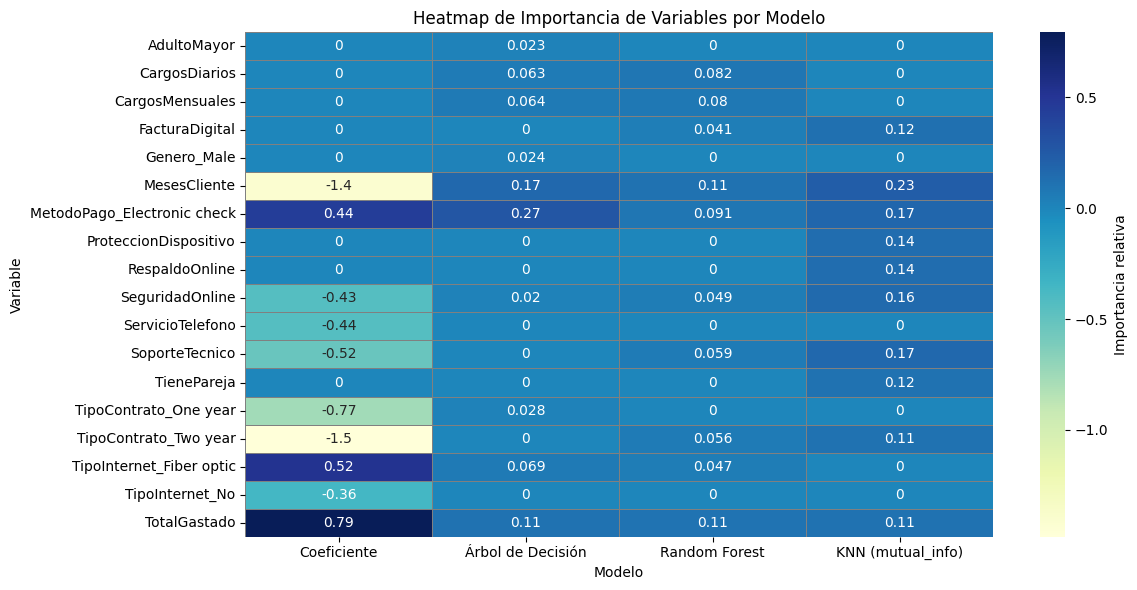

In [71]:
# Heatmap de la tabla comparativa
plt.figure(figsize=(12, 6))
sns.heatmap(tabla_comparativa, annot=True, cmap="YlGnBu", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Importancia relativa'})
plt.title("Heatmap de Importancia de Variables por Modelo")
plt.xlabel("Modelo")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Interpretación:

+ Cuanto más oscuro o brillante sea el color, mayor es la importancia de esa variable para ese modelo.
+ Las variables con valores altos en varias columnas son clave para la predicción de cancelación.

# Conclusión

Con base en el análisis de importancia de variables y el rendimiento de los modelos, se identificaron los siguientes factores clave que influyen en la cancelación:

####  1. **Duración del contrato (`MesesCliente`)**
- Los clientes con menor antigüedad son significativamente más propensos a cancelar.
- Confirmado en todos los modelos.

####  2. **Total Gastado (`TotalGastado`)**
- Clientes con poco gasto tienden a cancelar más, reflejando bajo nivel de compromiso.

####  3. **Tipo de Contrato (`TipoContrato`)**
- Contratos mes a mes presentan mayor riesgo de cancelación.

####  4. **Método de Pago (`MetodoPago`)**
- Métodos como “transferencia electrónica” se asocian con mayor evasión.

####  5. **Cargos Mensuales (`CargosMensuales`)**
- Cargos más altos se relacionan con mayor probabilidad de churn en clientes recientes.

---

###  Rendimiento de los Modelos

| Modelo               | Accuracy | F1-Score | Comentario                        |
|----------------------|----------|----------|-----------------------------------|
| Regresión Logística  | 0.87     | 0.87     | Equilibrado, fácil de interpretar |
| Random Forest        | 0.86     | 0.86     | Robusto, buen rendimiento         |
| Árbol de Decisión    | 0.83     | 0.83     | Más propenso a overfitting        |
| KNN                  | 0.85     | 0.85     | Sensible al número de vecinos     |

**Mejor desempeño**: Regresión Logística por su balance entre precisión, interpretabilidad y recall.

---

### Estrategias de Retención

####  1. Fortalecer la retención temprana
- Implementar campañas de onboarding y seguimiento para clientes con menos de 6 meses.

####  2. Incentivar contratos a largo plazo
- Ofrecer descuentos a quienes migren de mensual a anual.

####  3. Facilitar métodos de pago automáticos
- Promocionar pago automático para reducir el churn.

####  4. Segmentar según nivel de gasto
- Personalizar acciones para clientes de bajo gasto.

####  5. Monitoreo constante del churn
- Automatizar alertas para perfiles con alto riesgo.
